# LeNet 신경망
3-1. Simple Classifier에서 겪었던 문제점을 LeNet은 해결해 줄 수 있을까?<br>
한 번 제대로 시작해보자.

Reference:<br>
https://github.com/Steve-YJ/deep-learning-from-scratch-studying/blob/master/03_PyTorch%EB%A1%9C%2060%EB%B6%84%EB%A7%8C%EC%97%90%20%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0/03.%20Neural%20Networks.ipynb

앞선 3-1. Simple Classifier의 데이터를 불러오자.<br>
대부분 학습 방법이 비슷하기에 <code>나만의 학습 패턴</code>을 만들어놓도록 하자

* Image Classifier 학습 패턴
    * #1. Import Library & Load Data
    * #2. Data Preprocessing
    * #3. Make Tensor
    * #4. 신경망 구성
    * #5. 모형 학습
    * #6. Accuracy Test
        참고<br>https://github.com/Steve-YJ/deep-learning-from-scratch-studying/blob/master/02_PyTorch_Introduction_Basic/Ch06_6.2_%EC%99%80%EC%9D%B8%20%EB%B6%84%EB%A5%98%EA%B8%B0%ED%95%98%EA%B8%B02_.ipynb

## #1. Import Library & Load Data

* PyTorch Library, scikit-learn Library, Pandas Library
* Load Data

In [1]:
# 기본 라이브러리 임포트
import os
import pickle
import numpy as np

# PyTorch 라이브러리 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

# scikit-learn 라이브러리 임포트
from sklearn.model_selection import train_test_split

# Pandas 라이브러리 임포트
import pandas as pd

### Load Data
Load pickle data

In [2]:
with open('../data.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
# data

In [4]:
malimg = data

In [5]:
data = malimg[0]
target = malimg[1]
print(data)
print(target)

[[ 94.  32.   2. ... 129. 102. 124.]
 [ 54.  29.   6. ... 106. 119. 100.]
 [ 54.  29.   6. ... 120. 126. 104.]
 ...
 [ 65.  22.  59. ... 117. 116.  98.]
 [ 65.  22.  59. ... 117. 116.  98.]
 [ 65.  22.  59. ... 117. 116.  98.]]
[ 0.  0.  0. ... 24. 24. 24.]


In [6]:
print('shape of data: ', data.shape)
print('shape of target: ', target.shape)

shape of data:  (9339, 50176)
shape of target:  (9339,)


In [7]:
print(type(data))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Torch로 학습하기 위해서는 Tensor로 변환을 해주어야 한다.

다음장 전처리에서 50176차원의 데이터를 224X224형상으로 변경해줘야한다!

다음장에서 하기 보다는 이번장에서 바로 작업을 해주는게 더 효율적인것으로 판단.<br>
이번장에서 데이터의 형상을 (9339, 50176)에서 (9339, 1, 224, 224)로 변경해준다.

In [8]:
data.shape

(9339, 50176)

In [9]:
data.reshape(9339, 1, 224, 224).shape

(9339, 1, 224, 224)

In [10]:
data = data.reshape(9339, 1, 224, 224)
print('data.shape:', data.shape)
print('target.shape: ', target.shape)

data.shape: (9339, 1, 224, 224)
target.shape:  (9339,)


## #2. Data Preprocessing
* 설명변수 목적변수 분할
* Train_Test Split

설명변수 목적변수 분할은 이미 되어있으므로 생략한다.

### Train_Test Split

In [11]:
# 데이터 집합을 훈련 데이터와 테스트 데이터로 분할해준다.
train_X, test_X, train_Y, test_Y = train_test_split(data, target, test_size = 0.2)
print(len(train_X))
print(len(test_X))

7471
1868


## #3. Make Tensor

완성된 train, test 데이터를 PyTorch의 Tensor 데이터로 변환해준다.<br>
즉 모델이 학습할 수 있는 데이터로 변환해주는 것이다.<br>
이 때 주의할 점은 두 가지이다.
* cuda()형태의 데이터로 변환
* shape reshape

### Tensor GPU loading

In [12]:
train_X = torch.from_numpy(train_X).float().cuda()
train_Y = torch.from_numpy(train_Y).long().cuda()

In [13]:
test_X = torch.from_numpy(test_X).float().cuda()
test_Y = torch.from_numpy(test_Y).long().cuda()

In [14]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

torch.Size([7471, 1, 224, 224])
torch.Size([7471])
torch.Size([1868, 1, 224, 224])
torch.Size([1868])


In [16]:
train_X.shape

torch.Size([7471, 1, 224, 224])

### 설명변수와 목적변수 병합

In [22]:
train = TensorDataset(train_X, train_Y)

# 텐서와 첫 번째 데이터 내용 확인
print(train[0])

(tensor([[[ 42.,  48.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  1.,   2.,   0.,  ...,   0.,   0.,   1.],
         ...,
         [ 68., 157., 145.,  ..., 103.,  96.,  95.],
         [ 86.,  89.,  54.,  ...,  76.,  67.,  81.],
         [ 67.,  92., 125.,  ...,  75., 112., 127.]]], device='cuda:0'), tensor(11, device='cuda:0'))


### Mini-Batch 분할

In [47]:
train_loader = DataLoader(train, batch_size=16, shuffle=True)

In [48]:
train_loader = DataLoader(train, batch_size=100, shuffle=True)

갑자기 batch가 헷갈리네...

## #4. 신경망 구성

LeNet.py로 구성한 LeNet을 불러온다.
* 데이터의 사이즈가 224x224이기에 conv층을 3층 추가해주었다. 
* 기존 2Conv에서 5Conv로 변환

In [17]:
import LeNet

In [18]:
net = LeNet.Net()
net = net.cuda()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(48, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=25, bias=True)
)


**해석해보자**

LeNet은 2개의 Conv Layer와 3개의 Linear Layer로 구성되어 있었으나<br>
주어진 데이터에 맞게 변환하기 위해 임의로 conv layer를 2층 더 쌓았다.

모델의 학습 가능한 매개변수들은 <code>net.parameters()</code>에 의해 반환된다.

In [19]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

16
torch.Size([6, 1, 3, 3])


Q. torch.Size([6, 1, 3, 3])이란 무엇인가??

필터를 통해 학습하는 parameter의 shape이다.

In [20]:
print(params[2].shape)

torch.Size([16, 6, 3, 3])


## #5. 모형 학습

이 신경망(LeNet)의 예상되는 입력의 크기는 32x32이다. 224x224 데이터를 학습시키기 위해서는 어떻게 해야할까?

이 전에 배우길, 32x32로 학습시키기 위해서는 이미지의 크기를 32x32로 변경해야 한다고 했다. 50176 크기의 데이터를 224x224로 변형해줘야 하지 않을까? 

In [26]:
data.shape

(9339, 1, 224, 224)

In [49]:
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(48, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=25, bias=True)
)


In [29]:
model = net
model

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(48, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=25, bias=True)
)

In [31]:
# # model라는 이름으로 클래스의 인스턴스 생성
# model = LeNet.Net()
# model = model.cuda()
# 오차함수 객체 생성
criterion = nn.CrossEntropyLoss()

# 최적화를 담당할 객체 생성
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습 시작
for epoch in range(400):
    total_loss = 0
    # 분할해둔 데이터를 꺼내온다.
    for train_x, train_y in train_loader:
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        # 경사 초기화
        optimizer.zero_grad()
        #순전파 계산
        output = model(train_x)
        # 오차 계산
        loss = criterion(output, train_y)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
        
        
    # 50회 마다 누적 오차 출력
    if (epoch+1) % 50 == 0:
        print(epoch+1, total_loss)

50 tensor(1178.0190, device='cuda:0')
100 tensor(1177.1636, device='cuda:0')
150 tensor(1177.5121, device='cuda:0')
200 tensor(1177.8057, device='cuda:0')
250 tensor(1177.8944, device='cuda:0')
300 tensor(1177.8851, device='cuda:0')
350 tensor(1177.7256, device='cuda:0')
400 tensor(1177.9833, device='cuda:0')


값이 전혀 수렴을 하지 못하고 있다.. -- 20.04.17.fri.am9.11--

* 학습이 전혀 되지 않을 때 방법
    * 파이토치 첫걸음 6-2(다층퍼셉트론)학습과 7-2(CNN)학습을 비교해보자
    * Key Paper에서 본 데이터를 통해 실험한 repository를 참고해 어떻게 실험해야 하는지 소스를 참고하도록 하자

Epoch의 수가 너무 작다. 2000으로 늘려보자<br>
출력은 10 단위로!

In [50]:
# # model라는 이름으로 클래스의 인스턴스 생성
# model = LeNet.Net()
# model = model.cuda()
# 오차함수 객체 생성
criterion = nn.CrossEntropyLoss()

# 최적화를 담당할 객체 생성
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습 시작
for epoch in range(2000):
    total_loss = 0
    # 분할해둔 데이터를 꺼내온다.
    for train_x, train_y in train_loader:
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        # 경사 초기화
        optimizer.zero_grad()
        #순전파 계산
        output = model(train_x)
        # 오차 계산
        loss = criterion(output, train_y)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
        
        
    # 50회 마다 누적 오차 출력
    if (epoch+1) % 10 == 0:
        print(epoch+1, total_loss)

10 tensor(188.9823, device='cuda:0')
20 tensor(188.9812, device='cuda:0')
30 tensor(188.9589, device='cuda:0')
40 tensor(189.0485, device='cuda:0')
50 tensor(188.8951, device='cuda:0')
60 tensor(189.0054, device='cuda:0')
70 tensor(189.0251, device='cuda:0')
80 tensor(188.9709, device='cuda:0')
90 tensor(189.0033, device='cuda:0')
100 tensor(189.0289, device='cuda:0')
110 tensor(189.0549, device='cuda:0')
120 tensor(189.0303, device='cuda:0')
130 tensor(189.0138, device='cuda:0')


KeyboardInterrupt: 

In [36]:
train_X.shape

torch.Size([7471, 1, 224, 224])

#### matplot library로 데이터 시각화
제대로된 학습이 되지 않는 이유가 데이터 shape문제 때문인지 한번 직접 뿌려서 확인해보자.

In [38]:
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline # 이미지를 노트북안에 출력하도록 함

UsageError: unrecognized arguments: # 이미지를 노트북안에 출력하도록 함


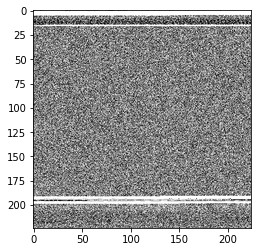

In [42]:
plt.imshow(train_X[0].reshape(224,224).cpu(), cmap=cm.gray_r)
plt.show()

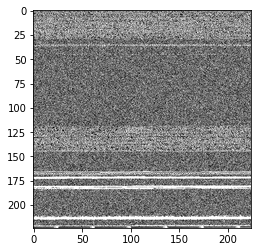

In [46]:
plt.imshow(train_X[6].reshape(224,224).cpu(), cmap=cm.gray_r)
plt.show()

batch사이즈를 100으로 한 번 늘려서 학습해보고 결과가 비슷하면 shape을 변경하는 코드를 다시 짜보자<br>
-20.04.17.fri-

## #6. Accuracy Test

### #2. 손실 함수(Loss Function)

In [18]:
input.shape

torch.Size([1, 1, 224, 224])

In [19]:
out = net(input)
out

tensor([[ 0.0781,  0.0022, -0.0408, -0.0224,  0.1153,  0.0840, -0.0416,  0.0545,
         -0.0296,  0.0198,  0.0179,  0.0489, -0.0859, -0.1015, -0.0310,  0.0112,
          0.0644, -0.1010,  0.0435, -0.0988, -0.0015, -0.0356,  0.0389,  0.0066,
         -0.0210]], device='cuda:0', grad_fn=<AddmmBackward>)

In [21]:
# example of MSE
output = net(input)
target = torch.randn(25).cuda()
target = target.view(1, -1)

criterion = nn.MSELoss()
loss = criterion(output, target)
print('loss: ', loss)

loss:  tensor(1.3235, device='cuda:0', grad_fn=<MseLossBackward>)


### #3. 역전파(Backward)
오차(Error)를 역전파하기 위해서 <code>loss.backward()</code>만 해주면 된다.

In [23]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.], device='cuda:0')
conv1.bias.grad before backward
tensor([ 2.8392e-04,  1.5035e-03,  7.9345e-05,  3.2950e-04, -8.5058e-05,
        -5.7681e-04], device='cuda:0')


### #4. 가중치 갱신

In [24]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [25]:
import torch.optim as optim

# Optimizer를 생성한다.
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 학습 과정(training loop)에서는 다음과 같다.
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()